Main data structure: Series and DataFrame clsses. 
Seires: one-dimensional indexed array of some fixed data type.
DataFrame: two-dimensional data structure - a table - where each column contains data of the same type. 


Each row corresponds to the object, and columns are features of the object.

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('data/telecom_churn.csv')
print(df.head()) #first 5 lines 

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [9]:
print(df.shape) # data dimensionality

(3333, 20)


In [10]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [12]:
df['Churn'] = df['Churn'].astype('int64')  # change the column tyoe with astype method. 

In [15]:
print(df.describe())  # show basic statistical characteristics of each numerical feature (int64 and float64 types)

       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [16]:
# statistics on non-numerical features:
df.describe(include= ['object', 'bool']) 

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [17]:
# for categorical (type object) and boolean (type bool) features:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [18]:
# calculate the proportion, pass normalize=True to the value_counts function
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [20]:
# Sorting
print(df.sort_values(by='Total day charge', ascending=False).head()) # in descending order

     State  Account length  Area code International plan Voice mail plan  \
365     CO             154        415                 No              No   
985     NY              64        415                Yes              No   
2594    OH             115        510                Yes              No   
156     OH              83        415                 No              No   
605     MO             112        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
365                       0              350.8               75   
985                       0              346.8               55   
2594                      0              345.3               81   
156                       0              337.4              120   
605                       0              335.5               77   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
365              59.64              216.5               94  

In [23]:
# Sort by multiple columns:
print(df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head())

     State  Account length  Area code International plan Voice mail plan  \
688     MN              13        510                 No             Yes   
2259    NC             210        415                 No             Yes   
534     LA              67        510                 No              No   
575     SD             114        415                 No             Yes   
2858    AL             141        510                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
688                      21              315.6              105   
2259                     31              313.8               87   
534                       0              310.4               97   
575                      36              309.9               90   
2858                     28              308.0              123   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
688              53.65              208.9               71  

Indexing and retrieving data
DataFrame can be indexed in differnet ways.



In [24]:
# the proportion of churend users in our dataframe
df['Churn'].mean()

0.14491449144914492

In [25]:
# Boolean indexing
# the average values of numerical variables for churned users?
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [26]:
# How much time on average do churned users spend on phone during daytime?
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494823

In [27]:
# the loc method is used for indexing by name, while iloc() is used for indexing by number.
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [28]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [30]:
print(df[-1:])

     State  Account length  Area code International plan Voice mail plan  \
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3332             39.85              265.9               82              22.6   

      Total night minutes  Total night calls  Total night charge  \
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3332                13.7                 4                3.7   

      Customer service calls  Churn  
3332                       0      0  


Applying Functions to Cells, Columns and Rows. \
To apply functions to each column, use aply()

In [31]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [33]:
# apply can also be used to apply a function to each line. specify axis=1. 
# select all states starting with W:
print(df[df['State'].apply(lambda state: state[0] == 'W')].head())

   State  Account length  Area code International plan Voice mail plan  \
9     WV             141        415                Yes             Yes   
26    WY              57        408                 No             Yes   
44    WI              64        510                 No              No   
49    WY              97        415                 No             Yes   
54    WY              87        415                 No              No   

    Number vmail messages  Total day minutes  Total day calls  \
9                      37              258.6               84   
26                     39              213.0              115   
44                      0              154.0               67   
49                     24              133.2              135   
54                      0              151.0               83   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
9              43.96              222.0              111             18.87   
26      

In [50]:
# map method can be used to replace values in a column by passing a dictionary of the form 
# {old_value: new value}
d = {False: 'No', True: 'Yes'}
df['International plan'] = df['International plan'].map(d)
print(df['International plan'][0:10]) # problem!!!!!!!

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: International plan, dtype: object


In [45]:
# replace
d = {False: 'No', True: 'Yes'}
df = df.replace({'Voice mail plan': d})
print(df.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                NaN             Yes   
1    OH             107        415                NaN             Yes   
2    NJ             137        415                NaN              No   
3    OH              84        408                NaN              No   
4    OK              75        415                NaN              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [46]:
# Grouping: 
# df.groupby(by=grouping_columns)[columns_to_show].function()
columns_show = ['Total day minutes', 'Total eve minutes']
df.groupby(['Churn'])[columns_show].describe(percentiles=[])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="6" halign="left">Total day minutes</th>
      <th colspan="6" halign="left">Total eve minutes</th>
    </tr>
    <tr>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>50%</th>
      <th>max</th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>50%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>Churn</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2850.0</td>
      <td>175.175754</td>
      <td>50.181655</td>
      <td>0.0</td>
      <td>177.2</td>
      <td>315.6</td>
      <td>2850.0</td>
      <td>199.043298</td>
      <td>50.292175</td>
      <td>0.0</td>
      <td>199.6</td>
      <td>361.8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>483.0</td>
      <td>206.914079</td>
      <td>68.997792</td>
      <td>0.0</td>
      <td>217.6</td>
      <td>350.8</td>
      <td>483.0</td>
      <td>212.410145</td>
      <td>51.728910</td>
      <td>70.9</td>
      <td>211.3</td>
      <td>363.7</td>
    </tr>
  </tbody>
</table>
</div>

In [47]:
# passing a list of functions to agg()
columns_show = ['Total day minutes', 'Total eve minutes']
df.groupby(['Churn'])[columns_show].agg([np.mean, np.std, np.min, np.max])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">Total day minutes</th>
      <th colspan="4" halign="left">Total eve minutes</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>amin</th>
      <th>amax</th>
      <th>mean</th>
      <th>std</th>
      <th>amin</th>
      <th>amax</th>
    </tr>
    <tr>
      <th>Churn</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>175.175754</td>
      <td>50.181655</td>
      <td>0.0</td>
      <td>315.6</td>
      <td>199.043298</td>
      <td>50.292175</td>
      <td>0.0</td>
      <td>361.8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>206.914079</td>
      <td>68.997792</td>
      <td>0.0</td>
      <td>350.8</td>
      <td>212.410145</td>
      <td>51.728910</td>
      <td>70.9</td>
      <td>363.7</td>
    </tr>
  </tbody>
</table>
</div>

In [56]:
# Summary tables
# contingency table
print(df['International plan'][0:5])
pd.crosstab(df['Churn'], df['International plan'])
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True) 

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: International plan, dtype: object


Voice mail plan,No,Yes
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


# pivot tables
#values - a list of variables to calculate statistics for,
#index – a list of variables to group data by,
#aggfunc — what statistics we need to calculate for groups - e.g sum, mean, maximum, minimum or something else.

In [57]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], \
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [60]:
# DataFrame transformations
total_calls = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] \
              + df['Total intl calls']
df.insert(loc=len(df.columns), column='total calls', value=total_calls)
print(df.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                NaN             Yes   
1    OH             107        415                NaN             Yes   
2    NJ             137        415                NaN              No   
3    OH              84        408                NaN              No   
4    OK              75        415                NaN              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes     ...       Total night minutes  \
0             45.07              197.4     ...                     244.7   
1             27.47     

In [61]:
# more easily way
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] +\
    df['Total night charge'] + df['Total intl charge']
print(df.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                NaN             Yes   
1    OH             107        415                NaN             Yes   
2    NJ             137        415                NaN              No   
3    OH              84        408                NaN              No   
4    OK              75        415                NaN              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes      ...       Total night calls  \
0             45.07              197.4      ...                      91   
1             27.47       

In [69]:
# drop method to delete columns. axis: 1 if delete columns, 0 to delete rows.
# df.drop(['Total charge', 'Total calls'], axis=1, inplace=True)   # delete columns
print(df.drop([1, 2]).head())   # delete rows

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                NaN             Yes   
3    OH              84        408                NaN              No   
4    OK              75        415                NaN              No   
5    AL             118        510                NaN              No   
6    MA             121        510                NaN             Yes   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   

   Total day charge  Total eve minutes     ...       Total eve charge  \
0             45.07              197.4     ...                  16.78   
3             50.90           

In [70]:
# predict telecom churn
pd.crosstab(df['Churn'], df['Voice mail plan'], margins=True)  # find relationship between churn and voice mail plan


Voice mail plan,No,Yes,All
Churn,,,
0,2008,842,2850
1,403,80,483
All,2411,922,3333


In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['image.cmap'] = 'viridis'

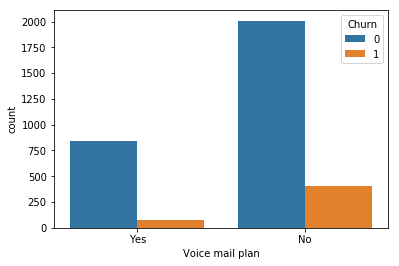

In [75]:
sns.countplot(x='Voice mail plan', hue='Churn', data=df);

In [76]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


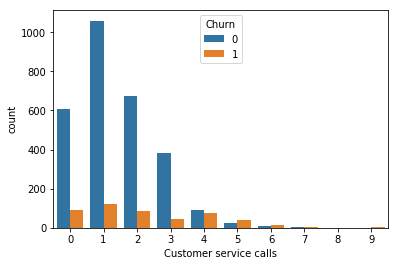

In [77]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

In [78]:
# Let’s now add a binary attribute to our DataFrame – Customer service calls > 3. 
# And once again, let's see how it relates to churn.
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')
pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


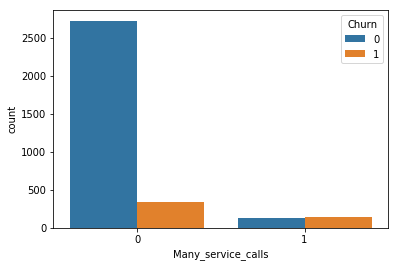

In [79]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

In [80]:
pd.crosstab(df['Many_service_calls'] & df['Voice mail plan'], df['Churn'])

Churn,0,1
row_0,,
False,2721,345
True,129,138
